<a href="https://colab.research.google.com/github/Recollectionss/numeral-methods/blob/main/lab4/lab_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Табличні точки (x): [0.         0.22439948 0.44879895 0.67319843 0.8975979  1.12199738
 1.34639685 1.57079633 1.7951958  2.01959528 2.24399475 2.46839423
 2.6927937  2.91719318 3.14159265]

Таблиця значень:
         x       f(x)    Interpolated
-----------------------------------
    0.0000     0.0000          0.0000
    0.2244     0.2207          0.2207
    0.4488     0.4204          0.4204
    0.6732     0.5839          0.5839
    0.8976     0.7046          0.7046
    1.1220     0.7839          0.7839
    1.3464     0.8277          0.8277
    1.5708     0.8415          0.8415
    1.7952     0.8277          0.8277
    2.0196     0.7839          0.7839
    2.2440     0.7046          0.7046
    2.4684     0.5839          0.5839
    2.6928     0.4204          0.4204
    2.9172     0.2207          0.2207
    3.1416     0.0000          0.0000


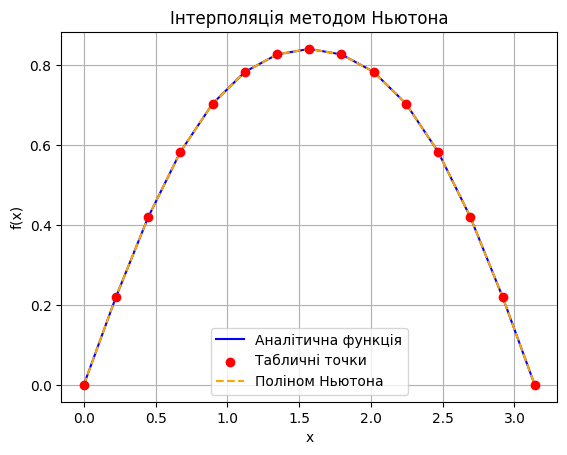


Обернена інтерполяція для y*=0.5000: x*=0.5511


In [10]:
import numpy as np
import matplotlib.pyplot as plt

# Аналітична функція
def f(x):
    return np.sin(np.sin(x))

# Таблична функція: 15 рівномірно розташованих точок
x_vals = np.linspace(0, np.pi, 15)
y_vals = f(x_vals)

# Метод Ньютона: побудова інтерполяційного полінома
def newton_interpolation(x_vals, y_vals, x):
    n = len(x_vals)
    divided_diff = np.zeros((n, n))
    divided_diff[:, 0] = y_vals

    for j in range(1, n):
        for i in range(n - j):
            divided_diff[i, j] = (divided_diff[i + 1, j - 1] - divided_diff[i, j - 1]) / (x_vals[i + j] - x_vals[i])

    # Побудова полінома Ньютона
    polynomial = divided_diff[0, 0]
    for i in range(1, n):
        term = divided_diff[0, i]
        for j in range(i):
            term *= (x - x_vals[j])
        polynomial += term
    return polynomial

# Виведення табличних значень для полінома Ньютона
def print_table(x_vals, y_vals, x_interp, y_interp):
    print("\nТаблиця значень:")
    print(f"{'x':>10} {'f(x)':>10} {'Interpolated':>15}")
    print("-" * 35)
    for i in range(len(x_interp)):  # Використовуються лише початкові 15 точок
        print(f"{x_interp[i]:10.4f} {f(x_interp[i]):10.4f} {y_interp[i]:15.4f}")

# Обернена інтерполяція
def inverse_interpolation(x_vals, y_vals, y_star):
    def root_function(x):
        return newton_interpolation(x_vals, y_vals, x) - y_star

    # Пошук інтервалу для кореня
    a, b = None, None
    for i in range(len(x_vals) - 1):
        if (y_vals[i] - y_star) * (y_vals[i + 1] - y_star) < 0:
            a, b = x_vals[i], x_vals[i + 1]
            break

    # Метод бісекції
    if a is not None and b is not None:
        return bisection_method(root_function, a, b)
    else:
        raise ValueError("Інтервал не знайдено для вказаного значення y_star")

# Власна реалізація методу бісекції
def bisection_method(func, a, b, tol=1e-6, max_iter=1000):
    if func(a) * func(b) > 0:
        raise ValueError("Функція повинна мати різні знаки на краях [a, b]")
    for _ in range(max_iter):
        c = (a + b) / 2
        if abs(func(c)) < tol or abs(b - a) < tol:
            return c
        if func(a) * func(c) < 0:
            b = c
        else:
            a = c
    raise ValueError("Метод бісекції не зійшовся за вказану кількість ітерацій")

# Основна програма
if __name__ == "__main__":
    # Використовуємо лише початкові 15 точок для інтерполяції
    x_interp = x_vals
    y_interp = [newton_interpolation(x_vals, y_vals, x) for x in x_interp]

    # Виведення табличних значень
    print_table(x_vals, y_vals, x_interp, y_interp)

    # Побудова графіків
    plt.plot(x_vals, [f(x) for x in x_vals], label="Аналітична функція", color="blue")
    plt.scatter(x_vals, y_vals, color="red", label="Табличні точки", zorder=5)
    plt.plot(x_interp, y_interp, label="Поліном Ньютона", linestyle="--", color="orange")
    plt.legend()
    plt.xlabel("x")
    plt.ylabel("f(x)")
    plt.title("Інтерполяція методом Ньютона")
    plt.grid(True)
    plt.show()

    # Демонстрація оберненої інтерполяції
    y_star = 0.5  # Значення функції
    try:
        x_star = inverse_interpolation(x_vals, y_vals, y_star)
        print(f"\nОбернена інтерполяція для y*={y_star:.4f}: x*={x_star:.4f}")
    except ValueError as e:
        print(f"\nПомилка оберненої інтерполяції: {e}")

